In [1]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data.csv')


/Users/shuchengyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/16/2018,0:10,MANHATTAN,10010,40.742275,-73.988914,"(40.742275, -73.988914)",5 AVENUE,BROADWAY,NaN,...,Unspecified,NaN,NaN,NaN,4021880,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,11/16/2018,0:40,NaN,NaN,40.762720,-73.728170,"(40.76272, -73.72817)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,Pavement Slippery,NaN,NaN,NaN,4021727,Sedan,Pick-up Truck,NaN,NaN,NaN
2,11/16/2018,0:45,BROOKLYN,11211,40.710197,-73.958430,"(40.710197, -73.95843)",BORINQUEN PLACE,HAVEMEYER STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4021791,Taxi,Taxi,NaN,NaN,NaN
3,11/16/2018,1:00,BRONX,10454,40.803555,-73.911840,"(40.803555, -73.91184)",EAST 137 STREET,WILLOW AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4021878,Garbage or Refuse,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,11/16/2018,1:00,BROOKLYN,11221,40.694923,-73.915565,"(40.694923, -73.915565)",WILSON AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4021848,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [4]:
len(df)

1385920

# Data Cleaning

In [5]:
# restirct data for the year of 2016 ane 2017
df = df[(df['DATE'].apply(lambda x : x[-4:]) == '2016') | (df['DATE'].apply(lambda x : x[-4:]) == '2017') ]

In [6]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

In [7]:
nan_cols = ['CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'VEHICLE TYPE CODE 2']
#rep_cols = ['ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME']
rep_cols = ['CROSS STREET NAME', 'OFF STREET NAME']

useless_cols = ['UNIQUE KEY']

In [8]:
df.drop(nan_cols, axis=1, inplace=True)
df.drop(rep_cols, axis=1, inplace=True)
df.drop(useless_cols, axis=1, inplace=True)

In [9]:
# target variable cleaning
df = df[pd.notnull(df['CONTRIBUTING FACTOR VEHICLE 1'])]
df = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']
df = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != '1']
df = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != '80']

#location feature clean missing value
df = df[pd.notnull(df['LATITUDE'])]
df = df[pd.notnull(df['LONGITUDE'])]

In [10]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
199123,12/15/2017,16:45,NaN,NaN,40.705246,-73.959080,"(40.705246, -73.95908)",NaN,0.0,0.0,0,0,0,0,0,0,Pavement Slippery,FB
200240,12/31/2017,0:00,QUEENS,11432,40.710133,-73.783330,"(40.710133, -73.78333)",NaN,0.0,0.0,0,0,0,0,0,0,Reaction to Other Uninvolved Vehicle,SPORT UTILITY / STATION WAGON
200241,12/31/2017,0:00,NaN,NaN,40.602673,-73.899330,"(40.602673, -73.89933)",BELT PARKWAY,0.0,0.0,0,0,0,0,0,0,Driver Inexperience,PASSENGER VEHICLE
200243,12/31/2017,0:01,BRONX,10456,40.828390,-73.916916,"(40.82839, -73.916916)",MORRIS AVENUE,0.0,0.0,0,0,0,0,0,0,Outside Car Distraction,SPORT UTILITY / STATION WAGON
200246,12/31/2017,0:14,NaN,NaN,40.860380,-73.888890,"(40.86038, -73.88889)",EAST FORDHAM ROAD,0.0,0.0,0,0,0,0,0,0,Pavement Slippery,PASSENGER VEHICLE


In [11]:
# # feature engeering with the target variable
# df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].astype('category')

In [12]:
# df['CONTRIBUTING FACTOR VEHICLE 1'].cat.categories

In [13]:
# merge weather data


In [14]:
# covert TIME to hour
def convert_time(time):
    try:
        return int(time[:-3])
    except:
        return 0
    
df['TIME'] = df['TIME'].apply(convert_time)

# Feature Engineering

## taget variable

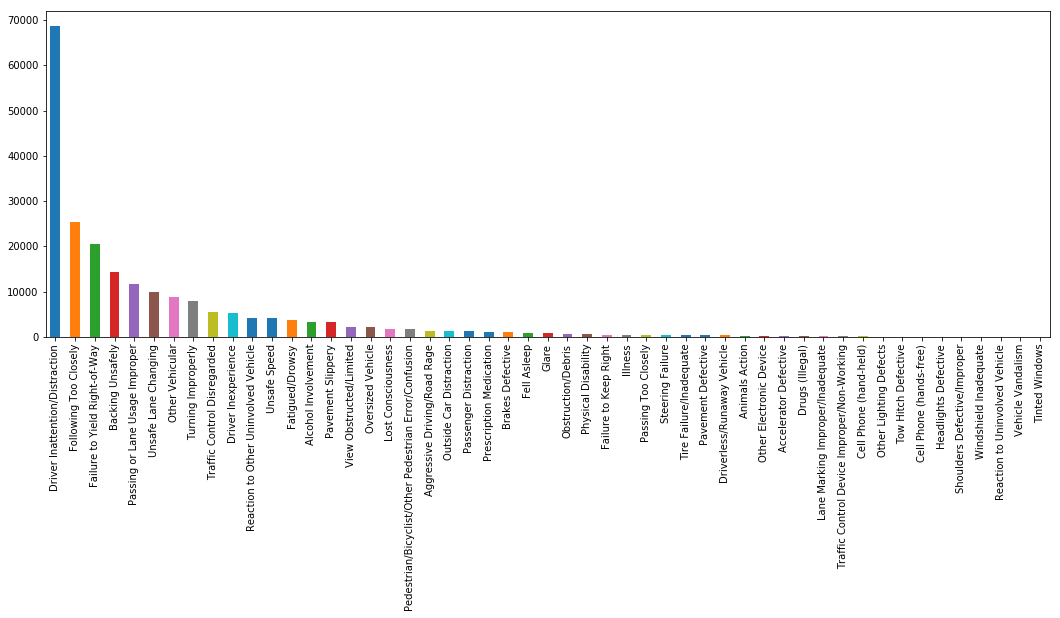

In [15]:
plt.figure(figsize=(18,6))
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().plot(kind = 'bar')

In [16]:
# all the contributing factors in the data set
p = df.groupby(['CONTRIBUTING FACTOR VEHICLE 1']).size()
p = p.sort_values(ascending = False)
p.keys()

Index(['Driver Inattention/Distraction', 'Following Too Closely',
       'Failure to Yield Right-of-Way', 'Backing Unsafely',
       'Passing or Lane Usage Improper', 'Unsafe Lane Changing',
       'Other Vehicular', 'Turning Improperly', 'Traffic Control Disregarded',
       'Driver Inexperience', 'Reaction to Other Uninvolved Vehicle',
       'Unsafe Speed', 'Fatigued/Drowsy', 'Alcohol Involvement',
       'Pavement Slippery', 'View Obstructed/Limited', 'Oversized Vehicle',
       'Lost Consciousness',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Aggressive Driving/Road Rage', 'Outside Car Distraction',
       'Passenger Distraction', 'Prescription Medication', 'Brakes Defective',
       'Fell Asleep', 'Glare', 'Obstruction/Debris', 'Physical Disability',
       'Failure to Keep Right', 'Illness', 'Passing Too Closely',
       'Steering Failure', 'Tire Failure/Inadequate', 'Pavement Defective',
       'Driverless/Runaway Vehicle', 'Animals Action',
       '

In [17]:
p

CONTRIBUTING FACTOR VEHICLE 1
Driver Inattention/Distraction                           68634
Following Too Closely                                    25299
Failure to Yield Right-of-Way                            20411
Backing Unsafely                                         14242
Passing or Lane Usage Improper                           11680
Unsafe Lane Changing                                      9833
Other Vehicular                                           8782
Turning Improperly                                        7989
Traffic Control Disregarded                               5502
Driver Inexperience                                       5335
Reaction to Other Uninvolved Vehicle                      4145
Unsafe Speed                                              4121
Fatigued/Drowsy                                           3793
Alcohol Involvement                                       3339
Pavement Slippery                                         3160
View Obstructed/Limited  

In [18]:
#target variable 

unpreditable = ['Animals Action', 'Eating or Drinking', 'Driver Inexperience',
                'Headlights Defective', 'Illness',
                'Lane Marking Improper/Inadequate', 'Oversized Vehicle','Passenger Distraction','Pavement Defective', 
                'Pavement Slippery', 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion', 'Physical Disability', 'Prescription Medication', 
                'Steering Failure', 'Tinted Windows', 'Tire Failure/Inadequate', 'Tow Hitch Defective', 'Shoulders Defective/Improper', 'Windshield Inadequate', 'Vehicle Vandalism',
               'Using On Board Navigation Device', 'Traffic Control Device Improper/Non-Working']


use_label = ['Failure to Yield Right-of-Way', 'Turning Improperly', 'Unsafe Lane Changing', 'Following Too Closely']

In [19]:
# only choosen labels for the project
df1 = df[df['CONTRIBUTING FACTOR VEHICLE 1'].isin(use_label)]

In [20]:
#encode target variable
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df1['CONTRIBUTING FACTOR VEHICLE 1'] = lb_make.fit_transform(df1['CONTRIBUTING FACTOR VEHICLE 1'])

mapping = {index : label for index,label in enumerate(lb_make.classes_)}
mapping

/Users/shuchengyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


{0: 'Failure to Yield Right-of-Way',
 1: 'Following Too Closely',
 2: 'Turning Improperly',
 3: 'Unsafe Lane Changing'}

# merge weather data


In [21]:
df_weather = pd.read_csv('weather.csv')
df_weather.head()

,Time,MaxTemperature(° F),AvgTemperature,MinTemperature,MaxDewPoint(° F),AvgDewPoint,MinDewPoint,MaxHumidity,MinHumidity,MaxWindSpeed(mph),MinWindSpeed,MaxPressure(Hg),MinPressure,Precipation(in)
0,01/01/2016,42,38,34,26,23,16,59%,44%,17,0,30.06,29.97,0.0
1,01/02/2016,40,36,32,20,18,15,52%,40%,15,0,30.10,29.96,0.0
2,01/03/2016,45,40,35,23,21,19,56%,37%,17,0,29.94,29.79,0.0
3,01/04/2016,36,25,14,23,9,0,59%,28%,21,4,30.32,29.87,0.0
4,01/05/2016,29,20,11,1,-3,-6,58%,24%,20,0,30.62,30.46,0.0


In [22]:
df_weather['MaxHumidity'] = df_weather['MaxHumidity'].map(lambda x : float(x[:-1]) / 100).astype(float)
df_weather['MinHumidity'] = df_weather['MinHumidity'].map(lambda x : float(x[:-1]) / 100).astype(float)

In [23]:
df_weather.dtypes

Time                    object
MaxTemperature(° F)      int64
AvgTemperature           int64
MinTemperature           int64
MaxDewPoint(° F)         int64
AvgDewPoint              int64
MinDewPoint              int64
MaxHumidity            float64
MinHumidity            float64
MaxWindSpeed(mph)        int64
MinWindSpeed             int64
MaxPressure(Hg)        float64
MinPressure            float64
Precipation(in)        float64
dtype: object

In [24]:
def convert_temp(tem):
    
    try:
        ans = float(tem)
        return ans
    except:
        return np.nan
        

In [25]:
# df_weather['DEW'] = df_weather['DEW'].map(convert_temp)
# df_weather['WIND DIR'] = df_weather['WIND DIR'].map(convert_temp)
# df_weather = df_weather.fillna(method='ffill')

In [26]:
df_weather.head()

,Time,MaxTemperature(° F),AvgTemperature,MinTemperature,MaxDewPoint(° F),AvgDewPoint,MinDewPoint,MaxHumidity,MinHumidity,MaxWindSpeed(mph),MinWindSpeed,MaxPressure(Hg),MinPressure,Precipation(in)
0,01/01/2016,42,38,34,26,23,16,0.59,0.44,17,0,30.06,29.97,0.0
1,01/02/2016,40,36,32,20,18,15,0.52,0.40,15,0,30.10,29.96,0.0
2,01/03/2016,45,40,35,23,21,19,0.56,0.37,17,0,29.94,29.79,0.0
3,01/04/2016,36,25,14,23,9,0,0.59,0.28,21,4,30.32,29.87,0.0
4,01/05/2016,29,20,11,1,-3,-6,0.58,0.24,20,0,30.62,30.46,0.0


In [27]:
df2 = df1.merge(df_weather, how='left', left_on='DATE', right_on='Time')

In [28]:
df_weather.groupby('Time').size().sort_values()[0:50]

Time
01/01/2016    1
08/29/2017    1
08/30/2016    1
08/30/2017    1
08/31/2016    1
08/31/2017    1
09/01/2016    1
09/01/2017    1
09/02/2016    1
08/29/2016    1
09/02/2017    1
09/03/2017    1
09/04/2016    1
09/04/2017    1
09/05/2016    1
09/05/2017    1
09/06/2016    1
09/06/2017    1
09/07/2016    1
09/03/2016    1
08/28/2017    1
08/28/2016    1
08/27/2017    1
08/18/2016    1
08/18/2017    1
08/19/2016    1
08/19/2017    1
08/20/2016    1
08/20/2017    1
08/21/2016    1
08/21/2017    1
08/22/2016    1
08/22/2017    1
08/23/2016    1
08/23/2017    1
08/24/2016    1
08/24/2017    1
08/25/2016    1
08/25/2017    1
08/26/2016    1
08/26/2017    1
08/27/2016    1
09/07/2017    1
09/08/2016    1
09/08/2017    1
09/09/2016    1
09/21/2016    1
09/21/2017    1
09/22/2016    1
09/22/2017    1
dtype: int64

In [29]:
df2.isna().any()

DATE                             False
TIME                             False
BOROUGH                           True
ZIP CODE                          True
LATITUDE                         False
LONGITUDE                        False
LOCATION                         False
ON STREET NAME                    True
NUMBER OF PERSONS INJURED        False
NUMBER OF PERSONS KILLED         False
NUMBER OF PEDESTRIANS INJURED    False
NUMBER OF PEDESTRIANS KILLED     False
NUMBER OF CYCLIST INJURED        False
NUMBER OF CYCLIST KILLED         False
NUMBER OF MOTORIST INJURED       False
NUMBER OF MOTORIST KILLED        False
CONTRIBUTING FACTOR VEHICLE 1    False
VEHICLE TYPE CODE 1               True
Time                             False
MaxTemperature(° F)              False
AvgTemperature                   False
MinTemperature                   False
MaxDewPoint(° F)                 False
AvgDewPoint                      False
MinDewPoint                      False
MaxHumidity              

In [30]:
df2

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,MaxDewPoint(° F),AvgDewPoint,MinDewPoint,MaxHumidity,MinHumidity,MaxWindSpeed(mph),MinWindSpeed,MaxPressure(Hg),MinPressure,Precipation(in)
0,12/31/2017,0,BROOKLYN,11206,40.703210,-73.946260,"(40.70321, -73.94626)",BROADWAY,0.0,0.0,...,11,-1,-5,0.73,0.42,17,6,30.33,30.05,0.0
1,12/31/2017,0,MANHATTAN,10002,40.718792,-73.989020,"(40.718792, -73.98902)",DELANCEY STREET,0.0,0.0,...,11,-1,-5,0.73,0.42,17,6,30.33,30.05,0.0
2,12/31/2017,0,MANHATTAN,10004,40.701782,-74.011170,"(40.701782, -74.01117)",SOUTH STREET,0.0,0.0,...,11,-1,-5,0.73,0.42,17,6,30.33,30.05,0.0
3,12/31/2017,0,NaN,NaN,40.740532,-73.944510,"(40.740532, -73.94451)",LONG ISLAND EXPRESSWAY,0.0,0.0,...,11,-1,-5,0.73,0.42,17,6,30.33,30.05,0.0
4,12/31/2017,10,BRONX,10470,40.895750,-73.864920,"(40.89575, -73.86492)",EAST 233 STREET,0.0,0.0,...,11,-1,-5,0.73,0.42,17,6,30.33,30.05,0.0
5,12/31/2017,10,BROOKLYN,11234,40.614876,-73.932106,"(40.614876, -73.932106)",KIMBALL STREET,0.0,0.0,...,11,-1,-5,0.73,0.42,17,6,30.33,30.05,0.0
6,12/31/2017,10,BRONX,10475,40.868320,-73.833170,"(40.86832, -73.83317)",BARTOW AVENUE,0.0,0.0,...,11,-1,-5,0.73,0.42,17,6,30.33,30.05,0.0
7,12/31/2017,10,BROOKLYN,11226,40.651150,-73.952540,"(40.65115, -73.95254)",NaN,0.0,0.0,...,11,-1,-5,0.73,0.42,17,6,30.33,30.05,0.0
8,12/31/2017,11,NaN,NaN,40.722305,-73.844140,"(40.722305, -73.84414)",108 STREET,0.0,0.0,...,11,-1,-5,0.73,0.42,17,6,30.33,30.05,0.0
9,12/31/2017,11,QUEENS,11413,40.676693,-73.742210,"(40.676693, -73.74221)",MERRICK BOULEVARD,2.0,0.0,...,11,-1,-5,0.73,0.42,17,6,30.33,30.05,0.0


In [31]:

df2.drop('Time', axis=1, inplace=True)

## vehicle type

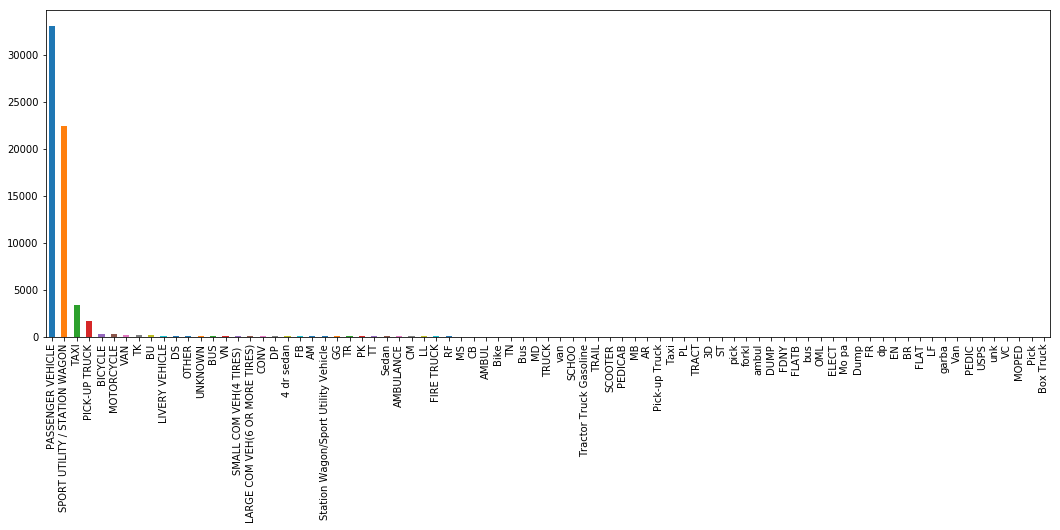

In [32]:
#distribution of vehicle type in the data set
plt.figure(figsize=(18,6))
df2['VEHICLE TYPE CODE 1'].value_counts().plot(kind = 'bar')

In [33]:
p1 = df2.groupby(['VEHICLE TYPE CODE 1']).size()
#p1 = p.sort_values(ascending = False)
#p1.keys()

In [34]:
p1.sort_values(ascending = False, inplace=True)

In [35]:
#only take the top 4 categories, put other vehicle categories into "other"p1
p1

VEHICLE TYPE CODE 1
PASSENGER VEHICLE                      33098
SPORT UTILITY / STATION WAGON          22473
TAXI                                    3402
PICK-UP TRUCK                           1687
BICYCLE                                  318
MOTORCYCLE                               256
VAN                                      196
TK                                       191
BU                                       180
LIVERY VEHICLE                           108
DS                                        96
OTHER                                     84
UNKNOWN                                   77
BUS                                       61
VN                                        59
SMALL COM VEH(4 TIRES)                    51
LARGE COM VEH(6 OR MORE TIRES)            47
CONV                                      39
DP                                        38
4 dr sedan                                23
FB                                        18
AM                                 

In [36]:
top4 = p1[:4]
list(top4.keys())

['PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'TAXI', 'PICK-UP TRUCK']

In [37]:
top4 = list(top4.keys())
def convert_vehicle_type(veh):
    if veh in top4:
        return veh
    else:
        return 'other'

In [38]:
df2['VEHICLE TYPE CODE 1'] = df2['VEHICLE TYPE CODE 1'].map(convert_vehicle_type)

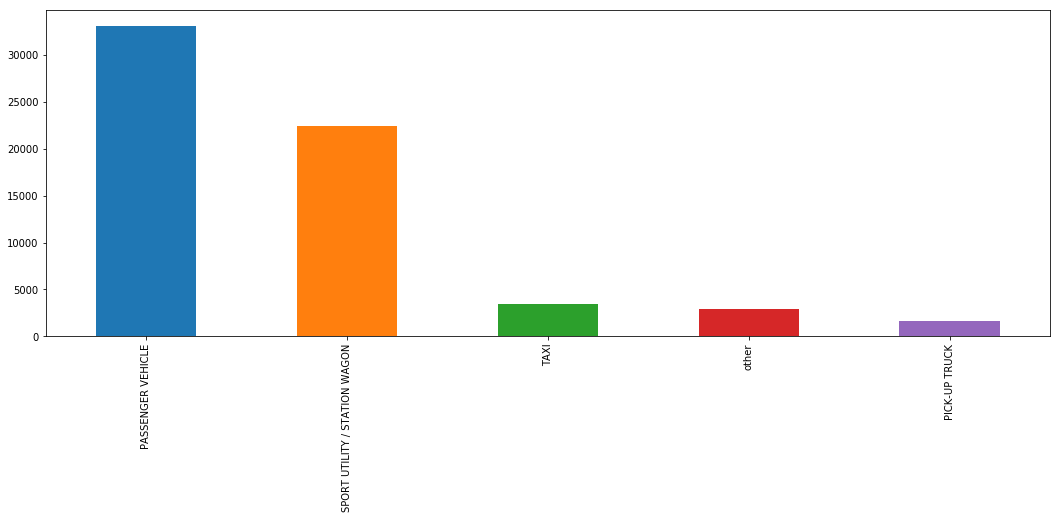

In [39]:
#after transformation
plt.figure(figsize=(18,6))
df2['VEHICLE TYPE CODE 1'].value_counts().plot(kind = 'bar')

In [40]:
#encode vehicle type
# df2['VEHICLE TYPE CODE 1'] = df2['VEHICLE TYPE CODE 1'].astype(str)
# lb_make1 = LabelEncoder()
# df2['VEHICLE TYPE CODE 1'] = lb_make1.fit_transform(df2['VEHICLE TYPE CODE 1'])

# mapping1 = {index : label for index,label in enumerate(lb_make1.classes_)}
# mapping1

In [41]:
#df3 = pd.get_dummies(df2, columns=['VEHICLE TYPE CODE 1'])
df3 = df2

In [42]:
df3.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'VEHICLE TYPE CODE 1', 'MaxTemperature(° F)', 'AvgTemperature',
       'MinTemperature', 'MaxDewPoint(° F)', 'AvgDewPoint', 'MinDewPoint',
       'MaxHumidity', 'MinHumidity', 'MaxWindSpeed(mph)', 'MinWindSpeed',
       'MaxPressure(Hg)', 'MinPressure', 'Precipation(in)'],
      dtype='object')

In [43]:
# df3[[ 'VEHICLE TYPE CODE 1_PASSENGER VEHICLE',
#        'VEHICLE TYPE CODE 1_PICK-UP TRUCK',
#        'VEHICLE TYPE CODE 1_SPORT UTILITY / STATION WAGON',
#        'VEHICLE TYPE CODE 1_TAXI', 'VEHICLE TYPE CODE 1_other']].head()

## time features

In [44]:
df3.dtypes

DATE                              object
TIME                               int64
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1      int64
VEHICLE TYPE CODE 1               object
MaxTemperature(° F)                int64
AvgTemperature                     int64
MinTemperature                     int64
MaxDewPoint(° F)                   int64
AvgDewPoint                        int64
MinDewPoint                        int64
MaxHumidity     

In [45]:
# new feature: day of the week

import datetime
df3['DATE'] = pd.to_datetime(df3['DATE'])


In [46]:
# new feature: week of the day

df3['day_of_week'] = df3['DATE'].apply(lambda x : x.weekday())
#df3 = pd.get_dummies(df3, columns=['day_of_week'])

In [47]:
# new feature weekday or weekend

df3['weeekday'] = df3['day_of_week'].map(lambda x: 1 if x < 5 else 0 )

In [48]:
len(df3[df3['weeekday'] == 1])

48693

In [49]:
# new feature: date

df3['date'] = df3['DATE'].apply(lambda x : x.day)

In [50]:
#new feature: month

df3['month'] = df3['DATE'].apply(lambda x : x.month)

In [51]:
df3.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,MinHumidity,MaxWindSpeed(mph),MinWindSpeed,MaxPressure(Hg),MinPressure,Precipation(in),day_of_week,weeekday,date,month
0,2017-12-31,0,BROOKLYN,11206,40.703210,-73.94626,"(40.70321, -73.94626)",BROADWAY,0.0,0.0,...,0.42,17,6,30.33,30.05,0.0,6,0,31,12
1,2017-12-31,0,MANHATTAN,10002,40.718792,-73.98902,"(40.718792, -73.98902)",DELANCEY STREET,0.0,0.0,...,0.42,17,6,30.33,30.05,0.0,6,0,31,12
2,2017-12-31,0,MANHATTAN,10004,40.701782,-74.01117,"(40.701782, -74.01117)",SOUTH STREET,0.0,0.0,...,0.42,17,6,30.33,30.05,0.0,6,0,31,12
3,2017-12-31,0,NaN,NaN,40.740532,-73.94451,"(40.740532, -73.94451)",LONG ISLAND EXPRESSWAY,0.0,0.0,...,0.42,17,6,30.33,30.05,0.0,6,0,31,12
4,2017-12-31,10,BRONX,10470,40.895750,-73.86492,"(40.89575, -73.86492)",EAST 233 STREET,0.0,0.0,...,0.42,17,6,30.33,30.05,0.0,6,0,31,12


In [52]:
#df3 = pd.get_dummies(df3, columns=['TIME', 'day_of_week', 'month', 'date'])
df4 = df3.drop(['DATE'], axis=1)


In [53]:
df4.columns

Index(['TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'ON STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'VEHICLE TYPE CODE 1', 'MaxTemperature(° F)', 'AvgTemperature',
       'MinTemperature', 'MaxDewPoint(° F)', 'AvgDewPoint', 'MinDewPoint',
       'MaxHumidity', 'MinHumidity', 'MaxWindSpeed(mph)', 'MinWindSpeed',
       'MaxPressure(Hg)', 'MinPressure', 'Precipation(in)', 'day_of_week',
       'weeekday', 'date', 'month'],
      dtype='object')

In [54]:
# # new feature: neighborhood 'neighbourhood'

# def get_neighbor(loc):
#     loc = loc.replace(" ", "")
#     geolocator = Nominatim()
#     location = geolocator.reverse(loc)
#     dic = location.raw['address']
   
#     p = dic.get('neighbourhood', 'missing')
#     print(p)
#     return p

# # new feature: county
# def get_county(loc):
#     loc = loc.replace(" ", "")
#     geolocator = Nominatim()
#     location = geolocator.reverse(loc)
#     dic = location.raw['address']
   
#     p = dic.get('county', 'missing')
#     print(p)
#     return p


## zipcode filling

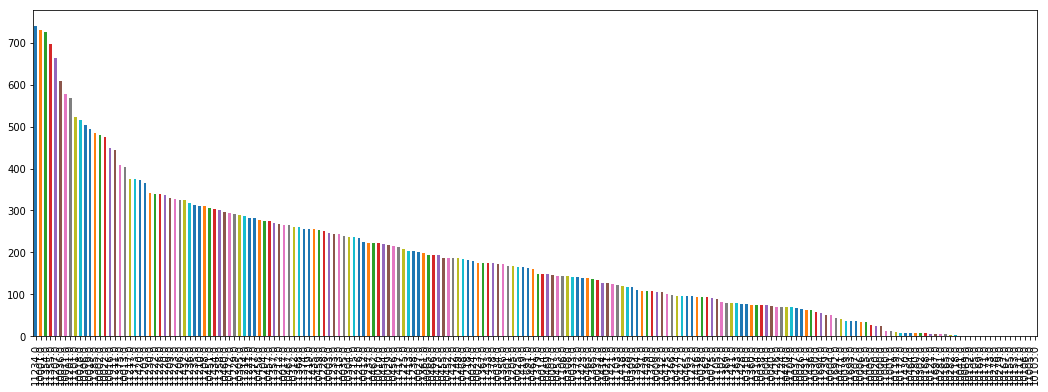

In [55]:
plt.figure(figsize=(18,6))
df4['ZIP CODE'].value_counts().plot(kind = 'bar')

In [56]:
from uszipcode import SearchEngine
fill_zip = SearchEngine(simple_zipcode=True)

In [57]:
df4.head()

,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,MinHumidity,MaxWindSpeed(mph),MinWindSpeed,MaxPressure(Hg),MinPressure,Precipation(in),day_of_week,weeekday,date,month
0,0,BROOKLYN,11206,40.703210,-73.94626,"(40.70321, -73.94626)",BROADWAY,0.0,0.0,0,...,0.42,17,6,30.33,30.05,0.0,6,0,31,12
1,0,MANHATTAN,10002,40.718792,-73.98902,"(40.718792, -73.98902)",DELANCEY STREET,0.0,0.0,0,...,0.42,17,6,30.33,30.05,0.0,6,0,31,12
2,0,MANHATTAN,10004,40.701782,-74.01117,"(40.701782, -74.01117)",SOUTH STREET,0.0,0.0,0,...,0.42,17,6,30.33,30.05,0.0,6,0,31,12
3,0,NaN,NaN,40.740532,-73.94451,"(40.740532, -73.94451)",LONG ISLAND EXPRESSWAY,0.0,0.0,0,...,0.42,17,6,30.33,30.05,0.0,6,0,31,12
4,10,BRONX,10470,40.895750,-73.86492,"(40.89575, -73.86492)",EAST 233 STREET,0.0,0.0,0,...,0.42,17,6,30.33,30.05,0.0,6,0,31,12


In [58]:
# filling missing zipcde
for i in range(0, len(df4)):
    
    if pd.notnull(df4.iloc[i, 2]):
        df4.iloc[i, 2] = str(df4.iloc[i, 2])[:-2]
    else: 
        res = fill_zip.by_coordinates(df4.iloc[i, 3], df4.iloc[i, 4], radius=30, returns=1)
        if len(res) >= 1:
            df4.iloc[i, 2] = res[0].zipcode
        else:
            pass
        
        
#         loc = (str(df2.iloc[i, 4]) + ',' + str(df2.iloc[i, 5]))
#         geolocator = Nominatim()
#     #location = geolocator.geocode("WILSON AVENUE NYC")
#         location = geolocator.reverse(loc)

#         #df2.iloc[i, 3] = str(location.raw['address']['postcode'])
#         if 'neighbourhood' in location.raw['address']:
#             print(location.raw['address']['neighbourhood'])
#         else:
#             print('missing')


In [59]:
#clean missing zipcode
df4 = df4[df4['ZIP CODE'] == df4['ZIP CODE']]

In [60]:
#check
sum(df4['ZIP CODE'].isnull()) / len(df4)

0.0

## zipcode information extraction

In [61]:
df4.iloc[2,1]

'MANHATTAN'

In [62]:
df4.head()

,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,MinHumidity,MaxWindSpeed(mph),MinWindSpeed,MaxPressure(Hg),MinPressure,Precipation(in),day_of_week,weeekday,date,month
0,0,BROOKLYN,11206,40.703210,-73.94626,"(40.70321, -73.94626)",BROADWAY,0.0,0.0,0,...,0.42,17,6,30.33,30.05,0.0,6,0,31,12
1,0,MANHATTAN,10002,40.718792,-73.98902,"(40.718792, -73.98902)",DELANCEY STREET,0.0,0.0,0,...,0.42,17,6,30.33,30.05,0.0,6,0,31,12
2,0,MANHATTAN,10004,40.701782,-74.01117,"(40.701782, -74.01117)",SOUTH STREET,0.0,0.0,0,...,0.42,17,6,30.33,30.05,0.0,6,0,31,12
3,0,NaN,11101,40.740532,-73.94451,"(40.740532, -73.94451)",LONG ISLAND EXPRESSWAY,0.0,0.0,0,...,0.42,17,6,30.33,30.05,0.0,6,0,31,12
4,10,BRONX,10470,40.895750,-73.86492,"(40.89575, -73.86492)",EAST 233 STREET,0.0,0.0,0,...,0.42,17,6,30.33,30.05,0.0,6,0,31,12


In [63]:
search = SearchEngine(simple_zipcode=False)

In [64]:
keys = ['population', 'population_density', 'housing_units', 'occupied_housing_units', 
       'median_home_value', 'median_household_income' ]

all_keys = ['population', 'population_density', 'housing_units', 'occupied_housing_units', 
       'median_home_value', 'median_household_income' ]

demo = []

for i in range(0, len(df4)):
    dic = search.by_zipcode(df4.iloc[i, 2]).to_dict()
    
    temp = [dic[key] for key in keys]
    
    
    if dic['population_by_age']:
    
        for di in dic['population_by_age'][2]['values']:
            if i == 0:
                all_keys.append('age range ' + di['x'])
            temp.append(di['y'])
            
            
            
    if dic['population_by_race']:
    
        for di in dic['population_by_race'][0]['values']:
            if i == 0:
                all_keys.append('race_' + di['x'])
            temp.append(di['y'])           
    
    
    if dic['population_by_gender']:
    
        for di in dic['population_by_gender'][0]['values']:
            if i == 0:
                all_keys.append('gender_' + di['x'])
            temp.append(di['y'])


    if dic['household_income']:
    
        for di in dic['household_income'][0]['values']:
            if i == 0:
                all_keys.append('household income_' + di['x'])
            temp.append(di['y'])
            
            
    if dic['educational_attainment_for_population_25_and_over']:
    
        for di in dic['educational_attainment_for_population_25_and_over'][0]['values']:
            if i == 0:
                all_keys.append('education_' + di['x'])
            temp.append(di['y'])
    
    
    if dic['year_housing_was_built']:
    
        for di in dic['year_housing_was_built'][0]['values']:
            if i == 0:
                all_keys.append('year_house_built_' + di['x'])
            temp.append(di['y'])
            
            
    if dic['means_of_transportation_to_work_for_workers_16_and_over']:
    
        for di in dic['means_of_transportation_to_work_for_workers_16_and_over'][0]['values']:
            if i == 0:
                all_keys.append('trans_to_work' + di['x'])
            temp.append(di['y'])
            
            
    if dic['travel_time_to_work_in_minutes']:
    
        for di in dic['travel_time_to_work_in_minutes'][0]['values']:
            if i == 0:
                all_keys.append('minute_to_work' + di['x'])
            temp.append(di['y'])            
    
    demo.append(temp)

In [65]:
all_keys

['population',
 'population_density',
 'housing_units',
 'occupied_housing_units',
 'median_home_value',
 'median_household_income',
 'age range Under 5',
 'age range 5-9',
 'age range 10-14',
 'age range 15-19',
 'age range 20-24',
 'age range 25-29',
 'age range 30-34',
 'age range 35-39',
 'age range 40-44',
 'age range 45-49',
 'age range 50-54',
 'age range 55-59',
 'age range 60-64',
 'age range 65-69',
 'age range 70-74',
 'age range 75-79',
 'age range 80-84',
 'age range 85 Plus',
 'race_White',
 'race_Black Or African American',
 'race_American Indian Or Alaskan Native',
 'race_Asian',
 'race_Native Hawaiian & Other Pacific Islander',
 'race_Other Race',
 'race_Two Or More Races',
 'gender_Male',
 'gender_Female',
 'household income_< $25,000',
 'household income_$25,000-$44,999',
 'household income_$45,000-$59,999',
 'household income_$60,000-$99,999',
 'household income_$100,000-$149,999',
 'household income_$150,000-$199,999',
 'household income_$200,000+',
 'education_Les

In [66]:
all_keys

['population',
 'population_density',
 'housing_units',
 'occupied_housing_units',
 'median_home_value',
 'median_household_income',
 'age range Under 5',
 'age range 5-9',
 'age range 10-14',
 'age range 15-19',
 'age range 20-24',
 'age range 25-29',
 'age range 30-34',
 'age range 35-39',
 'age range 40-44',
 'age range 45-49',
 'age range 50-54',
 'age range 55-59',
 'age range 60-64',
 'age range 65-69',
 'age range 70-74',
 'age range 75-79',
 'age range 80-84',
 'age range 85 Plus',
 'race_White',
 'race_Black Or African American',
 'race_American Indian Or Alaskan Native',
 'race_Asian',
 'race_Native Hawaiian & Other Pacific Islander',
 'race_Other Race',
 'race_Two Or More Races',
 'gender_Male',
 'gender_Female',
 'household income_< $25,000',
 'household income_$25,000-$44,999',
 'household income_$45,000-$59,999',
 'household income_$60,000-$99,999',
 'household income_$100,000-$149,999',
 'household income_$150,000-$199,999',
 'household income_$200,000+',
 'education_Les

In [67]:
df_demo = pd.DataFrame(demo, index=df4.index, columns=all_keys)

In [68]:
df_demo = df_demo.fillna(df_demo.mean())

In [69]:
df_demo.head()

,population,population_density,housing_units,occupied_housing_units,median_home_value,median_household_income,age range Under 5,age range 5-9,age range 10-14,age range 15-19,...,"trans_to_workBicycle, Walked, Or Other Means",trans_to_workWorked At Home,minute_to_work< 10,minute_to_work10-19,minute_to_work20-29,minute_to_work30-39,minute_to_work40-44,minute_to_work45-59,minute_to_work60-89,minute_to_work90+
0,81677.0,56939.0,29941.0,28025.0,533400.0,28559.0,6781.0,6477.0,6297.0,6520.0,...,4540.0,1376.0,1192.0,3853.0,3899.0,7382.0,2248.0,4409.0,4554.0,1160.0
1,81410.0,92573.0,34541.0,32925.0,535600.0,33218.0,3620.0,3663.0,3660.0,4098.0,...,10302.0,1492.0,1534.0,6698.0,6858.0,9056.0,2094.0,2805.0,3432.0,796.0
2,3089.0,5519.0,2197.0,1692.0,894200.0,129313.0,202.0,101.0,54.0,59.0,...,625.0,144.0,69.0,627.0,556.0,372.0,36.0,81.0,44.0,37.0
3,25484.0,9744.0,12317.0,10429.0,654900.0,47142.0,1440.0,1254.0,1259.0,1518.0,...,992.0,328.0,366.0,1597.0,2339.0,3394.0,977.0,1791.0,1180.0,241.0
4,15293.0,10734.0,6882.0,6390.0,401200.0,58600.0,928.0,859.0,888.0,935.0,...,607.0,239.0,327.0,955.0,840.0,1148.0,474.0,900.0,1515.0,579.0


In [117]:
df5 = pd.concat([df4, df_demo], axis=1, join='inner')

# Text feature exploration

ON STREET NAME
1 AVENUE                              247
1 COURT                                 1
10 AVENUE                             356
10 STREET                              11
100 AVENUE                              3
100 STREET                              6
101 AVENUE                             30
101 STREET                              4
102 AVENUE                              3
102 ROAD                                1
102 STREET                             11
103 AVENUE                             25
103 ROAD                                1
103 STREET                              8
104 AVENUE                              8
104 STREET                             10
105 AVENUE                              6
105 STREET                              2
106 STREET                              4
107 AVENUE                             20
107 STREET                              3
108 AVENUE                              3
108 STREET                             62
108th St           

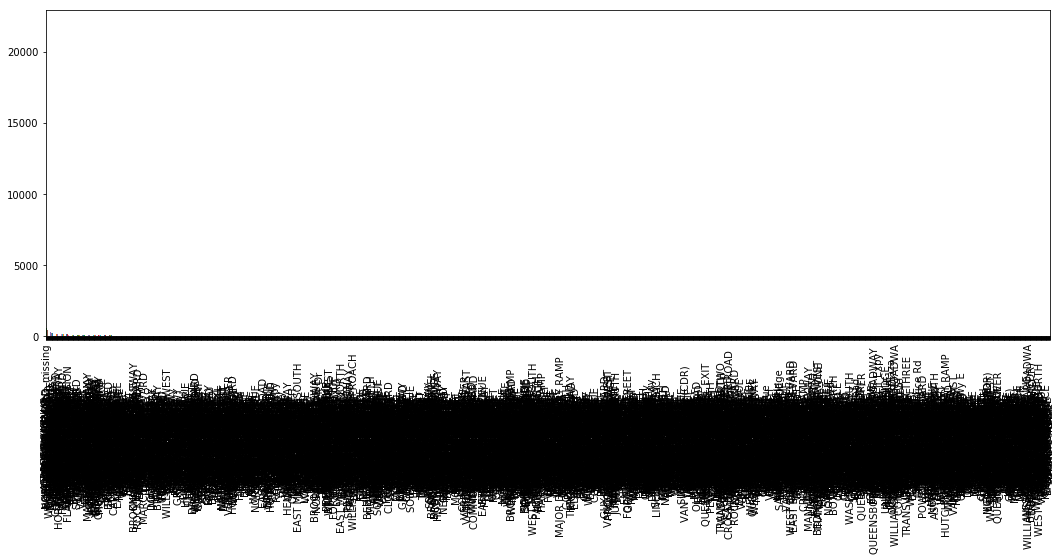

In [118]:
# #after transformation
# plt.figure(figsize=(18,6))
# df4['ON STREET NAME'].value_counts().plot(kind = 'bar')

# df4.groupby(['ON STREET NAME']).size()

In [72]:
# s = df4.groupby(['ON STREET NAME']).size()
# s = s.sort_values(ascending=False)


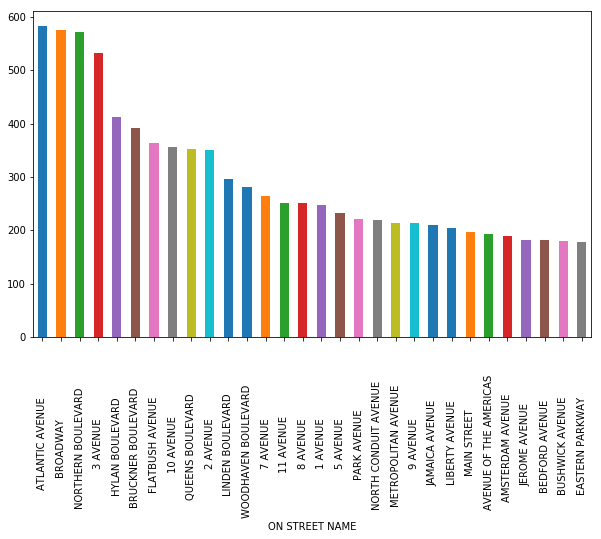

In [73]:
# ss = s[0:30]
# ss.plot(kind='bar', figsize=(10,6))

In [74]:
# def convert_street(name):
#     if name != name:
#         return 'missing'
#     else:
#         return name

In [75]:
# df4['ON STREET NAME'] = df4['ON STREET NAME'].map(convert_street)

In [76]:
# corpus = list(df4['ON STREET NAME'])

In [77]:
# from sklearn.feature_extraction.text import CountVectorizer
# # corpus = [
# #     'This is the first document.',
# #     'This document is the second document.',
# #    'And this is the third one.',
# #     'Is this the first document?',
# # ]
# vectorizer = CountVectorizer(stop_words='english', ngram_range=(2,3), max_features=20)
# X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names())

# print(X.toarray())  

['10 avenue', '11 avenue', 'atlantic avenue', 'bruckner boulevard', 'conduit avenue', 'flatbush avenue', 'fordham road', 'hill road', 'hylan boulevard', 'jamaica avenue', 'liberty avenue', 'linden boulevard', 'metropolitan avenue', 'north conduit', 'north conduit avenue', 'northern boulevard', 'park avenue', 'queens boulevard', 'west street', 'woodhaven boulevard']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [78]:
# len(np.unique([i for i in df4['BOROUGH'] if i == i]))

5

## final categorial variable conversion

In [120]:
df5.dtypes

TIME                                              int64
BOROUGH                                          object
ZIP CODE                                         object
LATITUDE                                        float64
LONGITUDE                                       float64
LOCATION                                         object
ON STREET NAME                                   object
NUMBER OF PERSONS INJURED                       float64
NUMBER OF PERSONS KILLED                        float64
NUMBER OF PEDESTRIANS INJURED                     int64
NUMBER OF PEDESTRIANS KILLED                      int64
NUMBER OF CYCLIST INJURED                         int64
NUMBER OF CYCLIST KILLED                          int64
NUMBER OF MOTORIST INJURED                        int64
NUMBER OF MOTORIST KILLED                         int64
CONTRIBUTING FACTOR VEHICLE 1                     int64
VEHICLE TYPE CODE 1                              object
MaxTemperature(° F)                             

In [121]:
#df6 = pd.get_dummies(df5, columns=['ZIP CODE', 'BOROUGH'], dummy_na=False)
df6 = df5

In [122]:
# drop all non-numeric feture
df6.drop(['LOCATION','ON STREET NAME', 'BOROUGH'], axis=1, inplace=True)

In [123]:
df6.columns

Index(['TIME', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       ...
       'trans_to_workBicycle, Walked, Or Other Means',
       'trans_to_workWorked At Home', 'minute_to_work< 10',
       'minute_to_work10-19', 'minute_to_work20-29', 'minute_to_work30-39',
       'minute_to_work40-44', 'minute_to_work45-59', 'minute_to_work60-89',
       'minute_to_work90+'],
      dtype='object', length=101)

In [124]:
df6.dtypes

TIME                                              int64
ZIP CODE                                         object
LATITUDE                                        float64
LONGITUDE                                       float64
NUMBER OF PERSONS INJURED                       float64
NUMBER OF PERSONS KILLED                        float64
NUMBER OF PEDESTRIANS INJURED                     int64
NUMBER OF PEDESTRIANS KILLED                      int64
NUMBER OF CYCLIST INJURED                         int64
NUMBER OF CYCLIST KILLED                          int64
NUMBER OF MOTORIST INJURED                        int64
NUMBER OF MOTORIST KILLED                         int64
CONTRIBUTING FACTOR VEHICLE 1                     int64
VEHICLE TYPE CODE 1                              object
MaxTemperature(° F)                               int64
AvgTemperature                                    int64
MinTemperature                                    int64
MaxDewPoint(° F)                                

In [125]:
df6.head()

,TIME,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,...,"trans_to_workBicycle, Walked, Or Other Means",trans_to_workWorked At Home,minute_to_work< 10,minute_to_work10-19,minute_to_work20-29,minute_to_work30-39,minute_to_work40-44,minute_to_work45-59,minute_to_work60-89,minute_to_work90+
0,0,11206,40.703210,-73.94626,0.0,0.0,0,0,0,0,...,4540.0,1376.0,1192.0,3853.0,3899.0,7382.0,2248.0,4409.0,4554.0,1160.0
1,0,10002,40.718792,-73.98902,0.0,0.0,0,0,0,0,...,10302.0,1492.0,1534.0,6698.0,6858.0,9056.0,2094.0,2805.0,3432.0,796.0
2,0,10004,40.701782,-74.01117,0.0,0.0,0,0,0,0,...,625.0,144.0,69.0,627.0,556.0,372.0,36.0,81.0,44.0,37.0
3,0,11101,40.740532,-73.94451,0.0,0.0,0,0,0,0,...,992.0,328.0,366.0,1597.0,2339.0,3394.0,977.0,1791.0,1180.0,241.0
4,10,10470,40.895750,-73.86492,0.0,0.0,0,0,0,0,...,607.0,239.0,327.0,955.0,840.0,1148.0,474.0,900.0,1515.0,579.0


In [126]:
df6.isna().any()

TIME                                            False
ZIP CODE                                        False
LATITUDE                                        False
LONGITUDE                                       False
NUMBER OF PERSONS INJURED                       False
NUMBER OF PERSONS KILLED                        False
NUMBER OF PEDESTRIANS INJURED                   False
NUMBER OF PEDESTRIANS KILLED                    False
NUMBER OF CYCLIST INJURED                       False
NUMBER OF CYCLIST KILLED                        False
NUMBER OF MOTORIST INJURED                      False
NUMBER OF MOTORIST KILLED                       False
CONTRIBUTING FACTOR VEHICLE 1                   False
VEHICLE TYPE CODE 1                             False
MaxTemperature(° F)                             False
AvgTemperature                                  False
MinTemperature                                  False
MaxDewPoint(° F)                                False
AvgDewPoint                 

In [127]:
df_weather.isna().any()

Time                   False
MaxTemperature(° F)    False
AvgTemperature         False
MinTemperature         False
MaxDewPoint(° F)       False
AvgDewPoint            False
MinDewPoint            False
MaxHumidity            False
MinHumidity            False
MaxWindSpeed(mph)      False
MinWindSpeed           False
MaxPressure(Hg)        False
MinPressure            False
Precipation(in)        False
dtype: bool

In [128]:
df6 = df6.dropna()
df6.shape

(63511, 101)

In [88]:
df6.to_csv('data.v2.1.csv', index=False)

In [129]:
df6.shape

(63511, 101)

In [130]:
df6.dtypes

TIME                                              int64
ZIP CODE                                         object
LATITUDE                                        float64
LONGITUDE                                       float64
NUMBER OF PERSONS INJURED                       float64
NUMBER OF PERSONS KILLED                        float64
NUMBER OF PEDESTRIANS INJURED                     int64
NUMBER OF PEDESTRIANS KILLED                      int64
NUMBER OF CYCLIST INJURED                         int64
NUMBER OF CYCLIST KILLED                          int64
NUMBER OF MOTORIST INJURED                        int64
NUMBER OF MOTORIST KILLED                         int64
CONTRIBUTING FACTOR VEHICLE 1                     int64
VEHICLE TYPE CODE 1                              object
MaxTemperature(° F)                               int64
AvgTemperature                                    int64
MinTemperature                                    int64
MaxDewPoint(° F)                                

In [131]:
df7 = pd.get_dummies(df6, columns=['ZIP CODE', 'VEHICLE TYPE CODE 1', 'TIME', 'day_of_week', 'month', 'date'], dummy_na=False)


In [132]:
df7.dtypes

LATITUDE                         float64
LONGITUDE                        float64
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1      int64
MaxTemperature(° F)                int64
AvgTemperature                     int64
MinTemperature                     int64
MaxDewPoint(° F)                   int64
AvgDewPoint                        int64
MinDewPoint                        int64
MaxHumidity                      float64
MinHumidity                      float64
MaxWindSpeed(mph)                  int64
MinWindSpeed                       int64
MaxPressure(Hg)                  float64
MinPressure                      float64
Precipation(in)                  float64
weeekday        

In [133]:
df7.to_csv('data.v2.2.csv', index=False)

In [92]:
# #encode vehicle type
# df6['VEHICLE TYPE CODE 1'] = df6['VEHICLE TYPE CODE 1'].astype(str)
# lb_make1 = LabelEncoder()
# df6['VEHICLE TYPE CODE 1'] = lb_make1.fit_transform(df6['VEHICLE TYPE CODE 1'])

# mapping1 = {index : label for index,label in enumerate(lb_make1.classes_)}
# mapping1

{0: 'PASSENGER VEHICLE',
 1: 'PICK-UP TRUCK',
 2: 'SPORT UTILITY / STATION WAGON',
 3: 'TAXI',
 4: 'other'}

In [94]:
# df6.dtypes['VEHICLE TYPE CODE 1']

dtype('int64')